## 2021년 11월 10일 스터디
**Dacon 대회 - 따릉이 대여량 예측 경진대회 - 쉽게_따라올 수 있는 따릉이 대여량 EDA(RF, Public _ 0.59891)**

2021/11/10 목주영

- 커널 링크 : https://dacon.io/competitions/official/235837/codeshare/3708?page=1&dtype=recent
    - https://dacon.io/competitions/official/235837/data 링크로 들어가 따릉이 데이터 다운받기
- 학습 방법 : 3번 필사해보기 + 공부한 내용 정리하여 개인 보관하기
- 리뷰 사항 : 코드 전반적인 발표 준비 + 인사이트와 아쉬운 사항 제기 및 보완<br>
- <span style="color:green"><b>역할 분담 : 주영 - 모델 간단 이론 설명(Randomforest, gradient boost, light grdient boost)</b></span>

**머신러닝 스터디**
- 목표 : 머신러닝 관련 실습을 통해, 국내 공모전 참여 및 수상
- 스터디 방법 : 캐글, 데이콘 튜토리얼 코드 리뷰 ~ 공모전 참여
- 소요 시간 : 1시간 30분~2시간(줌 온라인)

<span style="color:blue">**인사이트, 아쉬운 사항 제기 및 보완**</span>

<ol>
    <li>변수에 이상치가 있는지 확인하는 법을 알게되었다</li>
    <li><span style="color:red">몰랐던 메서드에 대한 설명 쓰기</span></li>
    <li> 특성을 제거하는 방식이 좋지 않다 (학습에 사용할 특성들의 추가,제거와 같은 수정이 용이하지 않음) -> 방식 바꾸기</li>
    <li>다른 특성들 추가해서 학습해보기</li>
    <li>다른 모델들로도 학습해보기</li>
    <li>K폴드 교차검증기법(K-fold Cross Validation) 사용하기</li>
    <li>성능 측정 지표 사용하기 -> RMSE (Root Mean Square Error, l2 norm), MAE (Mean Absolute Error, l1 norm), MSE, cost function</li>
    <li>모델을 적절하게 선택했는지 확인하는 방법들 -> Grid Search, Randomized Search, Ensemble Method 추후 사용할 예정</li>
</ol>

## 데이터 설명

1. bicycle_train.csv : 학습 데이터
- date_time : 일별 날짜
- wind_direction: 풍향 (degree)
- sky_condition : 하늘 상태 (하단 설명 참조)
- precipitation_form : 강수 형태 (하단 설명 참조)
- wind_speed : 풍속 (m/s)
- humidity : 습도 (%)
- low_temp : 최저 기온 ( `C)
- high_temp : 최고 기온 ( `C)
- Precipitation_Probability : 강수 확률 (%)
- number_of_rentals : 따릉이 대여량


2. bicycle_test.csv : 테스트 데이터
- date_time : 일별 날짜
- wind_direction: 풍향 (degree)
- sky_condition : 하늘 상태 (하단 설명 참조)
- precipitation_form : 강수 형태 (하단 설명 참조)
- wind_speed : 풍속 (m/s)
- humidity : 습도 (%)
- low_temp : 최저 기온 ( `C)
- high_temp : 최고 기온 ( `C)
- Precipitation_Probability : 강수 확률 (%)


3. sample_submissoin.csv : 제출 양식
- date_time : 일별 날짜
- number_of_rentals : 따릉이 대여량


- 데이터 상세 설명
    - 기상 데이터는 하루에 총 8번 3시간 간격으로 발표되는 기상단기예보(SHRT) 데이터를 1일 평균으로 변환한 데이터입니다.
    - 2019년 6월 4일 까지 sky_condition (하늘 상태) 코드  : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)
    - 2020년  sky_condition (하늘 상태) 코드  : 맑음(1), 구름많음(3), 흐림(4)
    - precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)
    - 원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.
    
    
link: https://dacon.io/competitions/official/235837/data

# 따릉이 데이터 예측 코드

# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# 데이터 불러오기
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv('dataset/test.csv')
sample_submission = pd.read_csv('dataset/sample_submission.csv')

train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [2]:
train.tail()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053
272,2020-06-30,120.797,3.622,0.432,5.574,77.061,19.125,26.053,41.284,38086


In [3]:
test.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459


In [4]:
sample_submission.head()

,date_time,number_of_rentals
0,2021-04-01,0
1,2021-04-02,0
2,2021-04-03,0
3,2021-04-04,0
4,2021-04-05,0


In [5]:
print(train.shape)
print(test.shape)
print(sample_submission.shape)

(273, 10)
(91, 9)
(91, 2)


# 변수 탐색

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


number_of_rentals : 따릉이 대여량(Y값), date_time : 날짜, wind_direction : 풍향

sky_condition : 하늘 상태(1 : 맑음, 3 : 구름 많음, 4 : 흐림, 하루에 8번 측정한 값 평균)

precipitation_form : 강수 형태(0 : 맑음, 1 : 비, 마찬가지로 하루에 8번 측정한 값 평균)

wind_speed : 풍속, humidity	: 습도, low_temp : 최저기온, high_temp : 최고기온, precipitation_Probability : 강수확률

결측값은 없습니다.


In [7]:
train.shape[0]

273

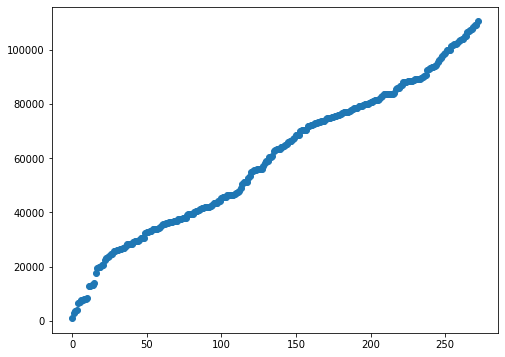

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train['number_of_rentals'].values))
plt.show()

반응변수의 이상치는 관찰되지 않는 것으로 보입니다.

0.0
1.0


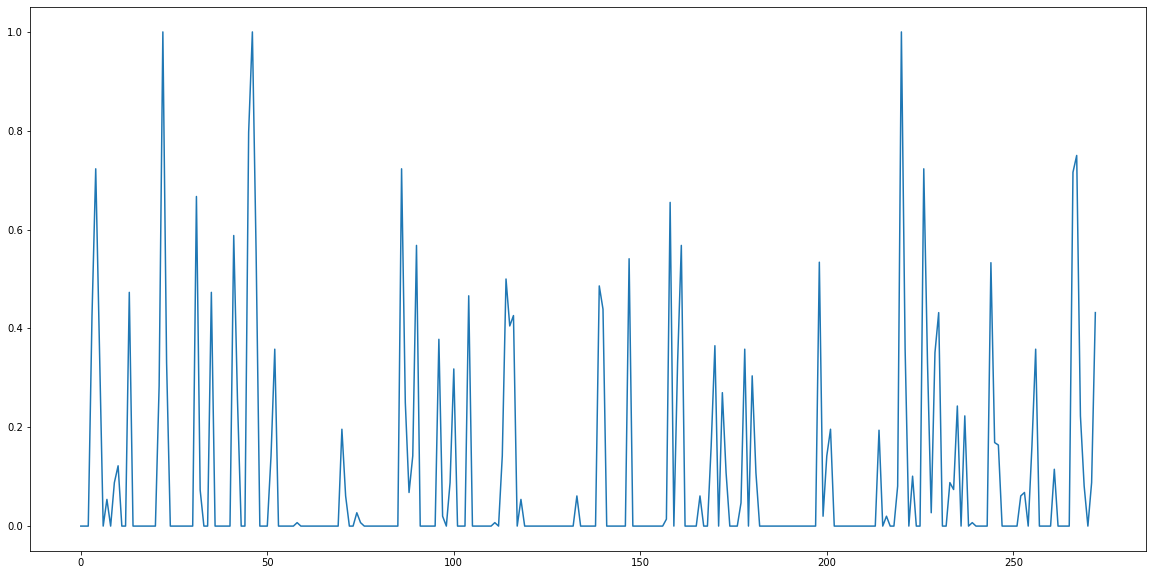

In [9]:
plt.figure(figsize=(20,10))
plt.plot(train['precipitation_form'])
print(train['precipitation_form'].min())
print(train['precipitation_form'].max())

# precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)
# 원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.

0.0
1.514


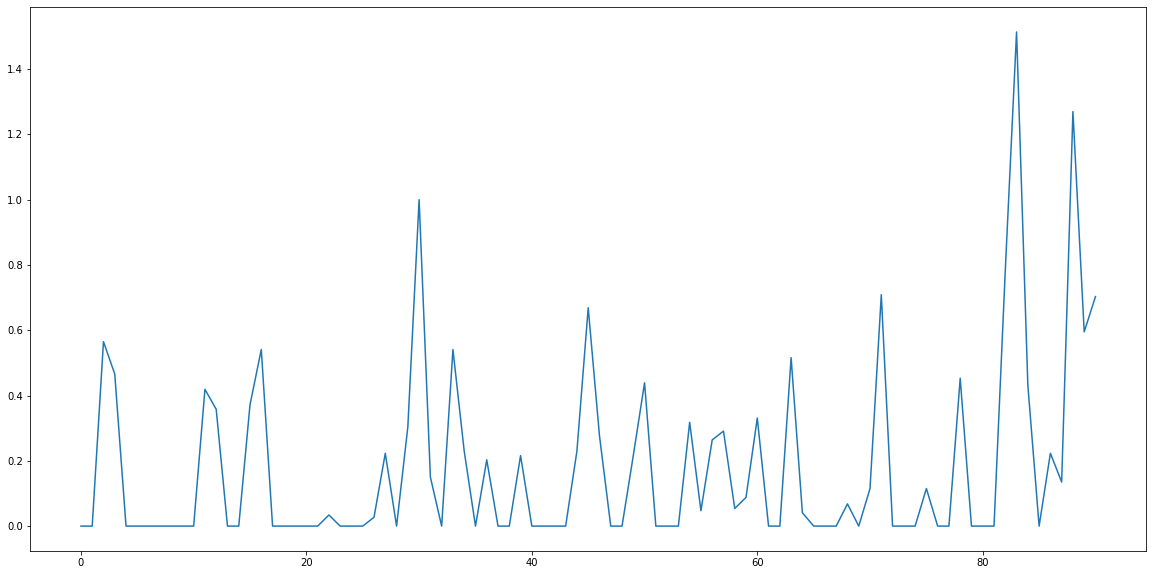

In [10]:
plt.figure(figsize=(20,10))
plt.plot(test['precipitation_form'])
print(test['precipitation_form'].min())
print(test['precipitation_form'].max())

# precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)
# 원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.

In [11]:
train['date_time']

0      2018-04-01
1      2018-04-02
2      2018-04-03
3      2018-04-04
4      2018-04-05
          ...    
268    2020-06-26
269    2020-06-27
270    2020-06-28
271    2020-06-29
272    2020-06-30
Name: date_time, Length: 273, dtype: object

### <span style="color:red">pd.to_datetime</span>

- Convert argument to datetime.

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [12]:
train['date_time'] = pd.to_datetime(train['date_time'])
test['date_time'] = pd.to_datetime(test['date_time'])

In [13]:
train['date_time']

0     2018-04-01
1     2018-04-02
2     2018-04-03
3     2018-04-04
4     2018-04-05
         ...    
268   2020-06-26
269   2020-06-27
270   2020-06-28
271   2020-06-29
272   2020-06-30
Name: date_time, Length: 273, dtype: datetime64[ns]

In [14]:
test['date_time']

0    2021-04-01
1    2021-04-02
2    2021-04-03
3    2021-04-04
4    2021-04-05
        ...    
86   2021-06-26
87   2021-06-27
88   2021-06-28
89   2021-06-29
90   2021-06-30
Name: date_time, Length: 91, dtype: datetime64[ns]

###  <span style="color:red">pd.DatetimeIndex</span>

- Immutable ndarray-like of datetime64 data.
- Represented internally as int64, and which can be boxed to Timestamp objects that are subclasses of datetime and carry metadata.

- Attributes

    - year: The year of the datetime.

    - month: The month as January=1, December=12.

    - day: The day of the datetime.

    - hour: The hours of the datetime.

    - minute: The minutes of the datetime.

    - second: The seconds of the datetime.

    - microsecond: The microseconds of the datetime.

    - nanosecond: The nanoseconds of the datetime.

    - date: Returns numpy array of python datetime.date objects (namely, the date part of Timestamps without timezone information).

    - time: Returns numpy array of datetime.time.
    
    - weekday: The day of the week with Monday=0, Sunday=6.

https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [15]:
train['date_time'].shape

(273,)

In [16]:
# date_time을 잘라서 train, test에 day, month, year, weekday 4개의 새로운 특성 넣어줌
train['day']=pd.DatetimeIndex(train['date_time']).day
test['day']=pd.DatetimeIndex(test['date_time']).day
train['month']=pd.DatetimeIndex(train['date_time']).month
test['month']=pd.DatetimeIndex(test['date_time']).month
train['year']=pd.DatetimeIndex(train['date_time']).year
test['year']=pd.DatetimeIndex(test['date_time']).year
train['weekday']=pd.DatetimeIndex(train['date_time']).weekday
test['weekday']=pd.DatetimeIndex(test['date_time']).weekday

In [17]:
train.shape

(273, 14)

In [18]:
test.shape

(91, 13)

In [19]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,day,month,year,weekday
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,1,4,2018,6
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2,4,2018,0
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,3,4,2018,1
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,4,4,2018,2
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,5,4,2018,3


In [20]:
train['day']

0       1
1       2
2       3
3       4
4       5
       ..
268    26
269    27
270    28
271    29
272    30
Name: day, Length: 273, dtype: int64

In [21]:
train['weekday']

0      6
1      0
2      1
3      2
4      3
      ..
268    4
269    5
270    6
271    0
272    1
Name: weekday, Length: 273, dtype: int64

date_time이 날짜 변수이기 때문에 데이터 형식을 datetime으로 바꾸어줍니다.

그 후 datetime 데이터 형식으로 얻을 수 있는 이점, 날/달/연/주말 변수를 추출합니다.

321.622

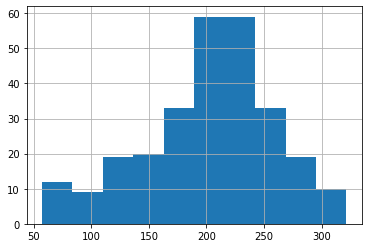

In [22]:
train['wind_direction'].hist()
train['wind_direction'].max()

wind_direction은 바람 방향 변수입니다. 아마 방향을 360도로 생각해서 만든 변수인 것 같습니다.

다만 바람 방향과 따릉이 대여량은 상관 없을 것 같습니다.

물론, 서울 자전거 도로가 한강 기준으로 많이 구성되어 있어 도로가 동-서 기준으로 많이 있긴 합니다.

하지만 바람 방향이 오늘은 이쪽이니 자전거를 타자라는 생각을 하진 않을 것 같습니다. 바람 세기가 더 중요하죠.

또 바람 방향 변수는 하루에도 계속 바뀌기 때문에 평균적인 방향인 것 같은데, 만약 바람이 주로 0에서 20, 340에서 360 각도로 불었을때 평균치는 약 180입니다.

(방향이 동쪽에서 위 아래로만 움직인다면 10에서 350으로 쉽게 바뀔 수 있습니다.)

이 수치가 과연 유의미할지 개인적으로 의문이 들어서, 이 변수는 빼는 것이 좋아보입니다.

In [23]:
train['precipitation_form'].corr(train['Precipitation_Probability']) # 두 특성의 correlation이 높을 시 학습할 특성을 둘 중 하나만 사용하기 위해 알아봄

0.9106089542607183

In [24]:
train['precipitation_form'].corr(train['sky_condition'])

0.6738137525457335

비가 오는 상황을 예측하는 두 변수 precipitation_form와 Precipitation_Probability간 상관관계는 당연히 높습니다.

다만 Precipitation_Probability는 강우 확률 예측 변수 입니다.

때문에 일일 강우 단기예측 기록인 precipitation_form 변수가 하루 비가 오는 날을 더 잘 표현할 것으로 생각됩니다.

비슷한 부분을 설명하는 두 변수이기 때문에 precipitation_form 변수만 사용하겠습니다.

precipitation_form 변수는 하늘 상태를 나타내는 sky_condition 변수와도 상관관계가 높지만 극단적이진 않습니다.

날씨가 흐린것 자체가 따릉이 대여량에 부정적인 영향을 준다고 생각하기 때문에 sky_condition 변수는 사용하겠습니다.

<span style="color:red">heatmap으로 correlation 확인</span>

<AxesSubplot:>

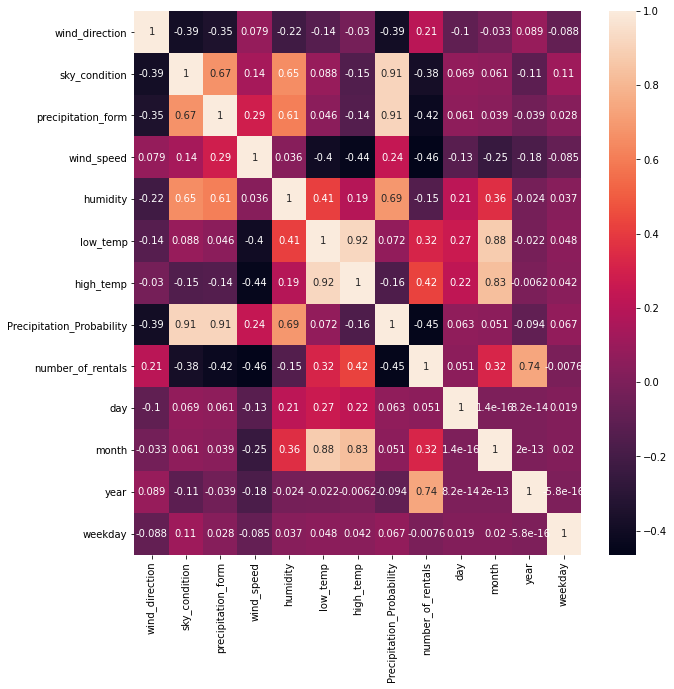

In [25]:
# heatmap으로 correlation 확인

import seaborn as sns

#train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True) #annot=True 상관계수 수치 

- <span style="color:red">Precipitation_Probability와 wind_speed, humidity가 number_of_rentals와 상관계수가 높은 것을 확인할 수 있음</span>

<BarContainer object of 91 artists>

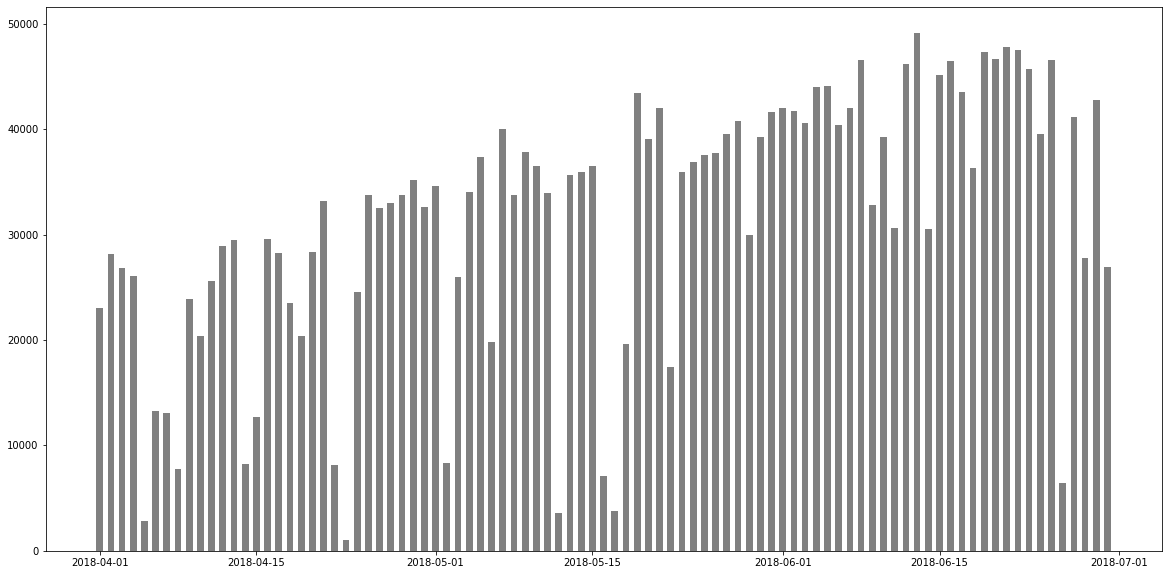

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.bar(train['date_time'][train['year'] == 2018], train['number_of_rentals'][train['year'] == 2018], width=0.6, color='grey')

In [27]:
train['day'][train['month'] == 5] += 30
train['day'][train['month'] == 6] += 61

test['day'][test['month'] == 5] += 30
test['day'][test['month'] == 6] += 61

<AxesSubplot:>

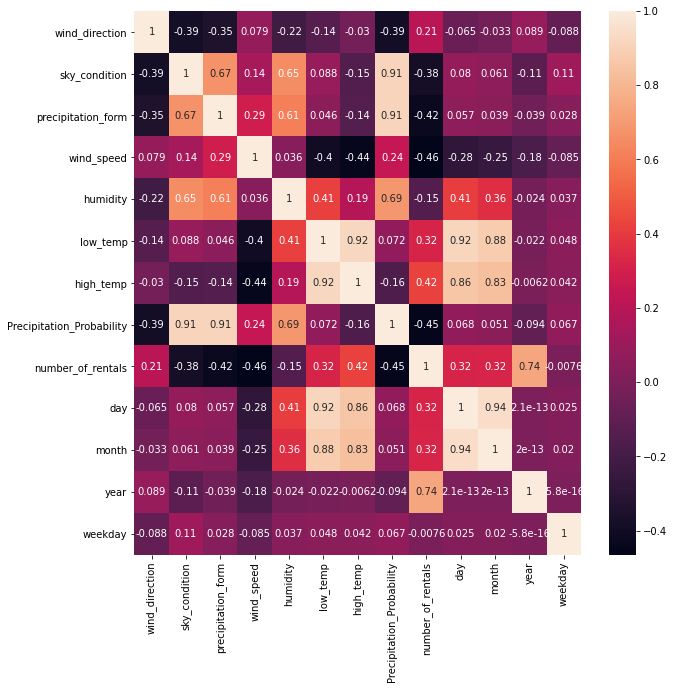

In [28]:
# heatmap으로 correlation 다시확인

import seaborn as sns

#train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True) #annot=True 상관계수 수치 

In [29]:
train['day'].corr(train['month'])

0.9428231182961591

따릉이 대여량을 2018년 기준으로 날짜순으로 확인했습니다.

4~6월 데이터인 만큼, 날이 점점 따뜻해지는 영향으로 변동이 심하긴 하지만 증가하는 추세가 보이는 것 같습니다.

(중간중간 값이 급격히 작아지는 것은 아마 비가 오는날인거 같습니다.) <span style="color:red"><- 확인 필요</span>

그래서 날짜 변수를 쓰는것 보다, 누적된 날짜가 몇일인지를 기록하는 변수를 쓰는게 좋을 것 같습니다.

(4월 15일 => 15일, 5월 2일 => 30일 + 2일 = 32일, 6월 10일 => 30일 + 31일 + 10일 = 71일)

이렇게 되면 달 변수 또한 쓰지 않는게 좋을 것 같습니다. 만든 변수가 달 변수가 설명할 부분까지 설명하기 때문이죠.

In [30]:
#(중간중간 값이 급격히 작아지는 것은 아마 비가 오는날인거 같습니다.) <- 확인 필요
train['precipitation_form']

# precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)
# 원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.

0      0.000
1      0.000
2      0.000
3      0.425
4      0.723
       ...  
268    0.223
269    0.081
270    0.000
271    0.088
272    0.432
Name: precipitation_form, Length: 273, dtype: float64

In [31]:
precipitation_lst = list()
#precipitation_lst = (train['precipitation_form'] >= 0.8).astype(np.int)

precipitation_lst = train['precipitation_form']*50000
precipitation_lst

0          0.0
1          0.0
2          0.0
3      21250.0
4      36150.0
        ...   
268    11150.0
269     4050.0
270        0.0
271     4400.0
272    21600.0
Name: precipitation_form, Length: 273, dtype: float64

<BarContainer object of 91 artists>

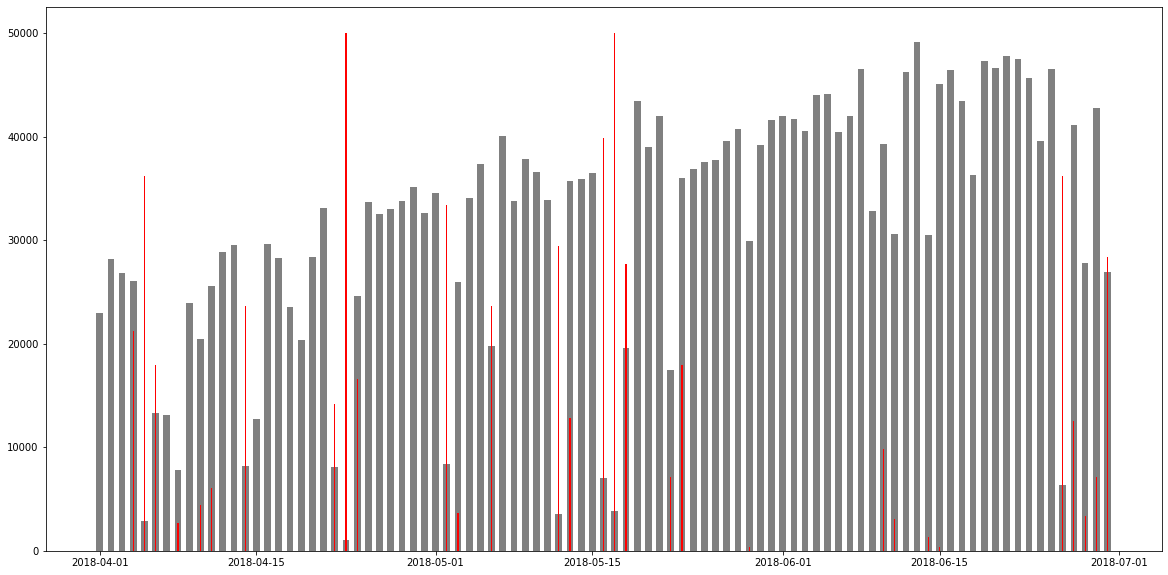

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.bar(train['date_time'][train['year'] == 2018], train['number_of_rentals'][train['year'] == 2018], width=0.6, color='grey')
plt.bar(train['date_time'][train['year'] == 2018], precipitation_lst[train['year'] == 2018], width=0.1, color='red')
#plt.axvline(precipitation_lst[1][:], color = 'r')

#중간중간 값이 급격히 작아지는 것은 거의 비가 오는날임을 확인할 수 있음

<span style="color:red">중간중간 값이 급격히 작아지는 것은 거의 비가 오는날임을 확인할 수 있음</span>

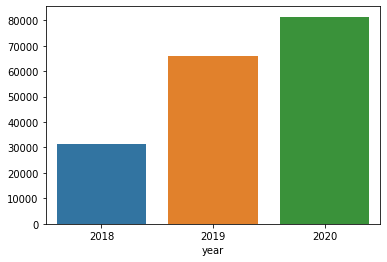

In [33]:
#import seaborn as sns

def barplots(variable):
    plot = train.groupby(variable)['number_of_rentals'].mean()
    sns.barplot(plot.index,plot.values)
barplots('year')

연도별 따릉이 이용자수를 나타내는 그래프 입니다.

시간이 지날수록 따릉이 이용자수가 늘어나는 것을 확인할 수 있습니다. 그러므로 연도 변수는 매우 중요한 변수임을 알 수 있겠죠.

1037
110377


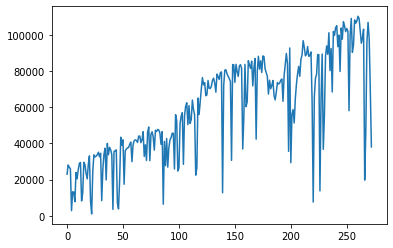

In [34]:
plt.plot(train['number_of_rentals'])

print(train['number_of_rentals'].min())
print(train['number_of_rentals'].max())

weekday
0    59752.153846
1    58680.384615
2    60191.179487
3    59590.897436
4    60832.948718
5    60887.282051
6    57090.000000
Name: number_of_rentals, dtype: float64


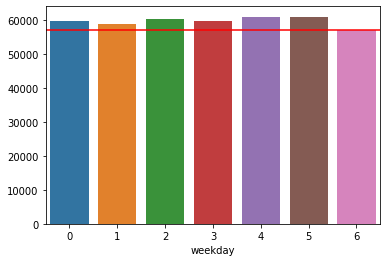

In [35]:
barplots('weekday')

print(train.groupby('weekday')['number_of_rentals'].mean()) # 평균 확인 (빨간색 라인)

plt.axhline(57090, color = 'r')

요일별 따릉이 이용자수를 나타내는 그래프 입니다. weekday 변수는 0은 월요일, 6은 일요일을 나타내는 요일 변수입니다. 

직관적으로 확인했을때 일요일에 따릉이 이용자수가 유의미하게 적은 것이 눈에 띕니다.

<span style="color:blue">특성을 제거하는 방식이 좋지 않다 (학습에 사용할 특성들의 추가,제거와 같은 수정이 용이하지 않음) -> 방식 바꾸기</span><br>
<span style="color:blue">특성 추가/제거하기, 하이퍼파라미터수 조절해보며 학습하기</span>

In [36]:
# x = features -> model -> y = count

features = ['wind_speed', 'humidity', 'precipitation_form', 'sky_condition', 'year', 'day', 'high_temp']
X_train = train[features]
y_train = train['number_of_rentals']
X_test = test[features]

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(273, 7)
(273,)
(91, 7)


In [38]:
from sklearn.ensemble import RandomForestRegressor
model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200, random_state=0)
model300 = RandomForestRegressor(n_estimators=300, random_state=0)

In [39]:
model100.fit(X_train, y_train)
model100_5.fit(X_train, y_train)
model200.fit(X_train, y_train)
model300.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [40]:
ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)
ypred4 = model300.predict(X_test)

In [41]:
sample_submission['number_of_rentals'] = ypred1
sample_submission.to_csv('model100.csv', index = False)

In [42]:
sample_submission['number_of_rentals'] = ypred2
sample_submission.to_csv('model100_5.csv', index = False)

In [43]:
sample_submission['number_of_rentals'] = ypred3
sample_submission.to_csv('model200_.csv', index = False)

In [44]:
sample_submission['number_of_rentals'] = ypred4
sample_submission.to_csv('model300.csv', index = False)

In [45]:
print(model100.score(X_train, y_train))
print(model100_5.score(X_train, y_train))
print(model200.score(X_train, y_train))
print(model300.score(X_train, y_train))

0.9786395163635
0.9406029262364277
0.9799782560856376
0.9795633060152673


In [46]:
model500 = RandomForestRegressor(n_estimators=500, random_state=0)
model500.fit(X_train, y_train)
sample_submission['number_of_rentals'] = model500.predict(X_test)
sample_submission.to_csv('model500.csv', index = False)
print(model500.score(X_train, y_train))

0.9800585509584765


<span style="color:blue">변수 제거해서 다시 학습하기</span>

In [47]:

#원본
#train_label = train['number_of_rentals']
#train.drop(['date_time','wind_direction', 'Precipitation_Probability', 'month', 'number_of_rentals'], axis = 1, inplace= True)
#test.drop(['date_time','wind_direction', 'Precipitation_Probability', 'month'], axis = 1, inplace= True)

train_label = train['number_of_rentals']
train.drop(['date_time','wind_direction', 'Precipitation_Probability', 'month', 'weekday', 'number_of_rentals'], axis = 1, inplace= True)
test.drop(['date_time','wind_direction', 'Precipitation_Probability', 'month', 'weekday'], axis = 1, inplace= True)

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sky_condition       91 non-null     float64
 1   precipitation_form  91 non-null     float64
 2   wind_speed          91 non-null     float64
 3   humidity            91 non-null     float64
 4   low_temp            91 non-null     float64
 5   high_temp           91 non-null     float64
 6   day                 91 non-null     int64  
 7   year                91 non-null     int64  
dtypes: float64(6), int64(2)
memory usage: 5.8 KB


In [49]:
rf = RandomForestRegressor(random_state = 0, n_estimators = 100)
rf.fit(train,train_label)
sample_submission['number_of_rentals'] = rf.predict(test)
sample_submission.to_csv('bicycle_final_4.csv',encoding='UTF-8',index=False)

간단한 랜덤 포레스트 모델을 사용했습니다. 다른 모델을 사용하거나 하이퍼 파라미터를 조정하면 점수가 더 오를수도 있겠죠?

In [50]:
rf.score(train,train_label)

0.9793031215137236

<span style="color:blue">다른 모델 사용해보기</span>

In [51]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train,train_label)
xgb.score(train,train_label)

0.9999998530715722


# <span style="color:green">모델 간단 이론 설명(Randomforest, gradient boost, light grdient boost)</span>


## Random forest

- Decision Tree의 앙상블 (일반적으로 배깅 방법 (또는 페이스팅)을 적용한 결정 트리의 앙상블)
    - 앙상블: a group of preditors (일련의 예측기)
    - 훈련 세트로부터 무작위로 각기 다른 서브셋을 만들어 일련의 결정 트리 분류기를 훈련시킬 수 있다. 예측을 하려면 모든 개별 트리의 예측을 구한다. 그런 다음 가장 많은 선택을 받은 클래스를 예측으로 삼는다.
    - 흔히 앙상블 방법을 사용하여 이미 만든 여러 괜찮은 예측기를 연결하여 더 좋은 예측기를 만듦
    - 앙상블 방법 중 배깅과 페이스팅 방법 모두 같은 알고리즘을 사용하고 훈련 세트의 서브셋을 무작위로 구성하여 분류기를 각기 다르게 학습시키는 것, 훈련세트에서 무작위로 샘플링하여 여러 개의 예측기를 훈련
    - 배깅: 훈련 세트에서 중복을 허용하여 샘플링하는 방식, 한 예측기를 위해 같은 훈련 샘플을 여러 번 샘플링할 수 있음
    - 페이스팅: 중복을 허용하지 않고 샘플링하는 방식, 한 예측기를 위해 같은 훈련 샘플을 여러 번 샘플링할 수 없음

- 오늘날 가장 강력한 머신러닝 알고리즘 중 하나

- n_estimator: the number of decision trees

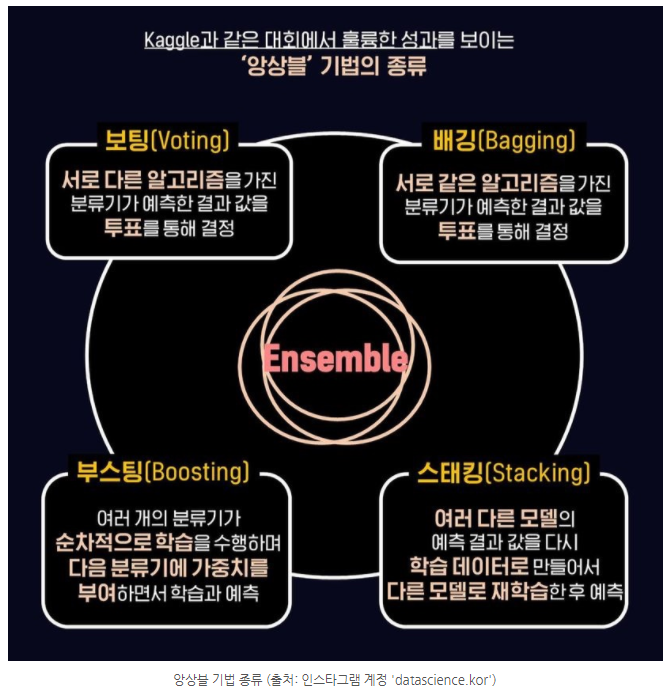

In [52]:
from IPython.display import Image
Image("emsembleMethod.png")

#https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o

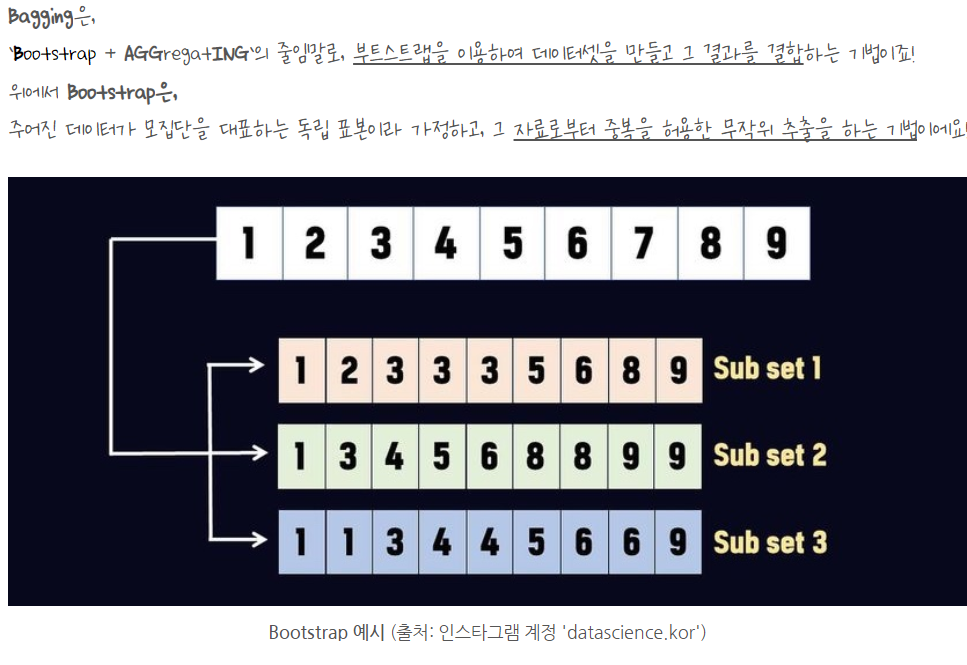

In [53]:
from IPython.display import Image
Image("bagging.png")

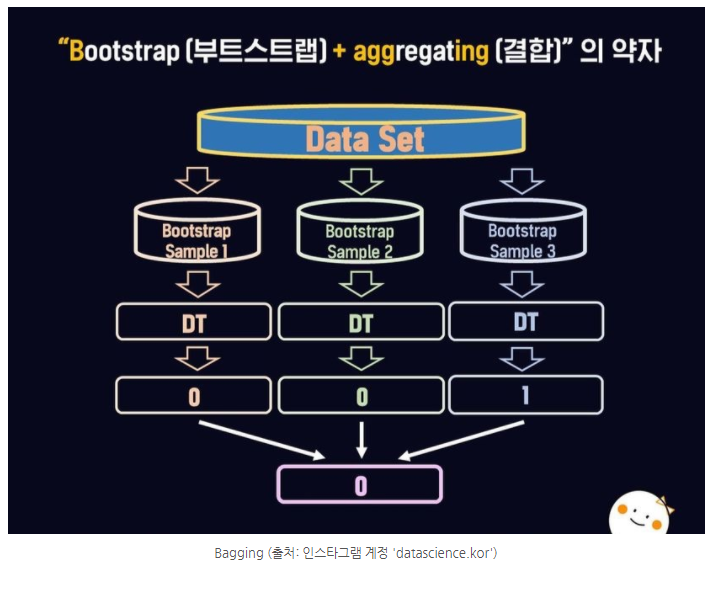

In [54]:
from IPython.display import Image
Image("bagging2.png")

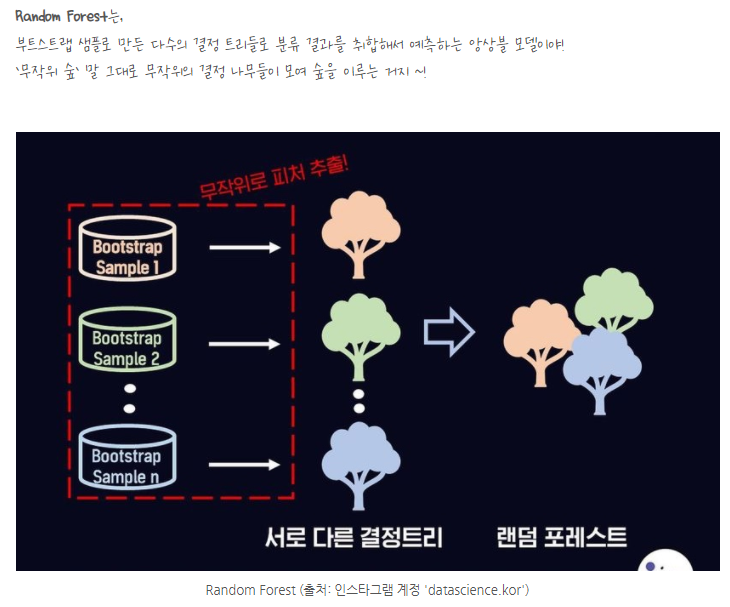

In [55]:
from IPython.display import Image
Image("randomForest.png")

## Gradient boost

- 앙상블 방법 중 부스팅 사용
    - 부스팅: 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법, 아이디어는 앞의 모델을 보완해나가면서 일련의 예측기를 학습시키는 것 (이전 예측기를 보완하는 새로운 예측기를 만듦)
    - 에이다 부스트: 이전 모델이 과소적합했던 훈련 샘플의 가중치를 더 높이며 새로운 예측기를 학습하기 어려운 샘플에 점점 더 맞춰지게 하는 것
    - 그레디언트 부스트: 에이다부스트와 같이 앙상블에 이전까지의 오차를 보정하도록 예측기를 순차적으로 추가. (에이다부스트와 다른 점은) 에이다부스트는 반복마다 샘플의 가중치를 수정하지만 그레디언트 부스트는 이전 예측기가 만든 잔여오차(residual error)에 새로운 예측기를 학습시킴

## Light Gradient Boost  = LightGBM (Light Gradient Boosting Machine)
- a free and open source distributed gradient boosting framework for machine learning originally developed by Microsoft. It is based on decision tree algorithms and used for ranking, classification and other machine learning tasks.
- 마이크로소프트가 개발한 머신러닝을 위한 자유 및 오픈 소스 분산 그레이디언트 부스팅 프레임워크, 의사 결정 트리 알고리즘을 기반으로 하며 순위, 분류 및 기타 기계 학습 작업에 사용된다.

#### RondomForest
: 부트스트랩 샘플로 만든 다수의 결정 트리들로 분류 결과를 취합해서 예측하는 앙상블 모델

https://blog.naver.com/harini1029/222473872962

#### LightGBM (Light Gradient Boosting Machine)
: a free and open source distributed gradient boosting framework for machine learning originally developed by Microsoft. It is based on decision tree algorithms and used for ranking, classification and other machine learning tasks.

: 마이크로소프트가 개발한 머신러닝을 위한 자유 및 오픈 소스 분산 그레이디언트 부스팅 프레임워크, 의사 결정 트리 알고리즘을 기반으로 하며 순위, 분류 및 기타 기계 학습 작업에 사용된다.

https://en.wikipedia.org/wiki/LightGBM

#### XGBoost (eXtreme Gradient Boosting)
: fast execution speed & great model performance

https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

#### KNeighborsRegressor
: K-최근접이웃회귀, Regression based on k-nearest neighbors, 샘플과 가장 가까운 이웃들의 평균값을 근거로 특정 값을 예측하는 알고리즘

https://blog.naver.com/psycomaniac/222404193295

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [56]:
# (모델을 여러개 쓸 때 - Bagging Boosting ) 모델을 하나만 쓸 때 - Original

# bagging 병렬적
# boosting 직렬

In [57]:
#public: test data 중 몇 개
#private: test data 전체